In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras import  layers,Model
from keras.preprocessing.image import ImageDataGenerator


from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainPath="/content/drive/MyDrive/Deep Learning/chest_xray_dataset/train"
testPath="/content/drive/MyDrive/Deep Learning/chest_xray_dataset/test"

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,         
    zoom_range=0.5,
    horizontal_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1) 
test_datagen=ImageDataGenerator(rescale=1./255)

trainDataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(299,299),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    subset='training'
)

valGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(299,299),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    subset='validation')

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(299,299),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
#train klasörü
print(trainGen.class_indices)
print("")
normal,bacteria,virus=(0,0,0)
for i in trainGen.classes:
  if i ==0:
    normal+=1
  if i ==1:
    bacteria+=1
  if i == 2:
    virus+=1
print("trainGen:","normal:",normal," bacteria:",bacteria," virus:",virus,"toplam:",normal+bacteria+virus)

#test klasörü
normal,bacteria,virus=(0,0,0)
for i in testGen.classes:
  if i ==0:
    normal+=1
  if i ==1:
    bacteria+=1
  if i == 2:
    virus+=1
print(" testGen:","normal:",normal,"  bacteria:",bacteria,"  virus:",virus," toplam:",normal+bacteria+virus)

#val klasörü
normal,bacteria,virus=(0,0,0)
for i in valGen.classes:
  if i ==0:
    normal+=1
  if i ==1:
    bacteria+=1
  if i == 2:
    virus+=1
print("  valGen:","normal:",normal,"  bacteria:",bacteria,"  virus:",virus," toplam:",normal+bacteria+virus)

{'NORMAL': 0, 'PNEUMONIA_BACTERIA': 1, 'PNEUMONIA_VIRUS': 2}

trainGen: normal: 1215  bacteria: 2285  virus: 1211 toplam: 4711
 testGen: normal: 234   bacteria: 242   virus: 148  toplam: 624
  valGen: normal: 134   bacteria: 253   virus: 134  toplam: 521


In [ ]:

base_model=InceptionResNetV2(input_shape=(299,299,3),
                 include_top=False,
                 weights='imagenet',
                 )
base_model.trainable=True
"""
for layer in base_model.layers[4:]:
  layer.trainable=True"""

x=layers.Flatten()(base_model.output)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dropout(0.5)(x)

out=layers.Dense(3,activation='softmax')(x)


model=Model(inputs=base_model.inputs,outputs=out)

model.summary()
"""
for layer in model.layers:
  print(layer.name," ",layer.trainable)
"""


model.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1218 (Conv2D)            (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1218 (Batch (None, 149, 149, 32) 96          conv2d_1218[0][0]                
__________________________________________________________________________________________________
activation_1218 (Activation)    (None, 149, 149, 32) 0           batch_normalization_1218[0][0]   
____________________________________________________________________________________________

In [ ]:
history=model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=10,
    validation_steps=valGen.samples//16
)

Epoch 1/10
294/294 [==============================] - 189s 597ms/step - loss: 0.6959 - accuracy: 0.7105 - val_loss: 0.3900 - val_accuracy: 0.8320
Epoch 2/10
294/294 [==============================] - 173s 588ms/step - loss: 0.4506 - accuracy: 0.7921 - val_loss: 0.3511 - val_accuracy: 0.8750
Epoch 3/10
294/294 [==============================] - 173s 588ms/step - loss: 0.3647 - accuracy: 0.8430 - val_loss: 0.3328 - val_accuracy: 0.8281
Epoch 4/10
294/294 [==============================] - 172s 585ms/step - loss: 0.2897 - accuracy: 0.8829 - val_loss: 0.3595 - val_accuracy: 0.8418
Epoch 5/10
294/294 [==============================] - 172s 586ms/step - loss: 0.2061 - accuracy: 0.9248 - val_loss: 0.3469 - val_accuracy: 0.8789
Epoch 6/10
294/294 [==============================] - 173s 587ms/step - loss: 0.1673 - accuracy: 0.9391 - val_loss: 0.4074 - val_accuracy: 0.8496
Epoch 7/10
294/294 [==============================] - 173s 587ms/step - loss: 0.1427 - accuracy: 0.9538 - val_loss: 0.4966 -

Text(0.5, 1.0, 'Accuracy Curves')

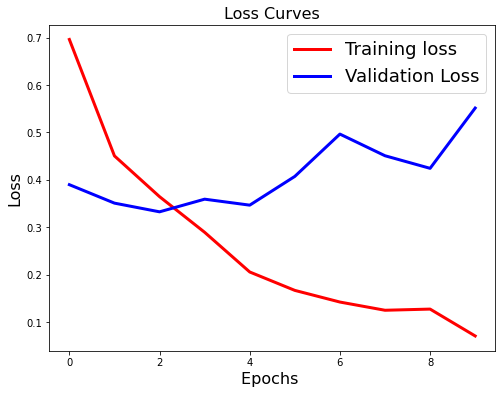

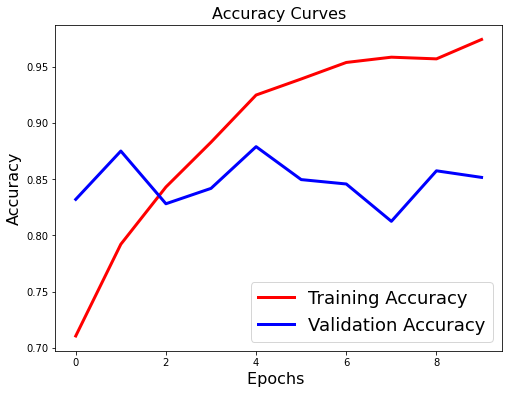

In [ ]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


Y_pred = model.predict_generator(trainGen, trainGen.samples // 10+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(trainGen.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Bacteria', 'Virus']
print(classification_report(trainGen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 294  633  288]
 [ 604 1193  488]
 [ 330  630  251]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.24      0.24      0.24      1215
    Bacteria       0.49      0.52      0.50      2285
       Virus       0.24      0.21      0.22      1211

    accuracy                           0.37      4711
   macro avg       0.32      0.32      0.32      4711
weighted avg       0.36      0.37      0.36      4711



In [ ]:
y_pred = np.argmax(model.predict(testGen), axis=1)
y_test = testGen.classes
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 45 127  62]
 [ 41 135  66]
 [ 22  81  45]]
              precision    recall  f1-score   support

           0       0.42      0.19      0.26       234
           1       0.39      0.56      0.46       242
           2       0.26      0.30      0.28       148

    accuracy                           0.36       624
   macro avg       0.36      0.35      0.34       624
weighted avg       0.37      0.36      0.34       624

